In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import pie_plot
import numpy as np


In this jupyter notebook you can find the analysis of the features from our dataset

In [2]:
data = pd.read_csv('../data/processed/fraud_viz_df.csv') 

# Visualization of variables

### Target variable: isFraud

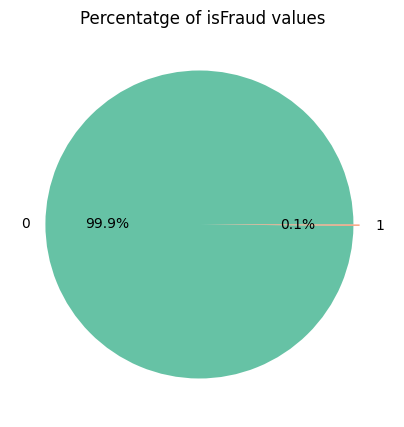

In [3]:
pie_plot(data['isFraud'])


In [4]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

This is an very imbalanced dataset

## Overview of the categorical columns

### Type

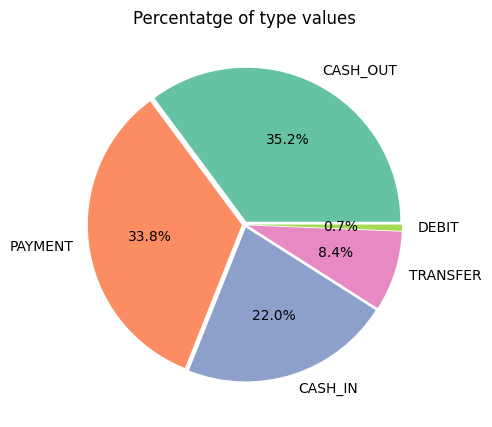

In [5]:
pie_plot(data['type'])

Observations: 

Fraud happens in two types of transactions: CASH_OUT and TRANSFER.

CASH_OUT fraud is mostly made by card clonation inside the ATM (it happened to me once). Improving security systems on ATM in order to avoid the easy installation of cloning devices inside them is a very important field to improve safety with card usage.

TRANSFER can be done using the data cloned from the ATM. Security or confirmation warnings sent by the bank app or via e-mail when there is a strange behaviour in your usage would help a lot in avoiding such cases. Nowadays scammers improved their strategies so much that they scam people pretending they call you from your bank or any other trustworthy institution and convince you to transfer money to their accounts. 

These cases are among many other but I considered them worth to mention some examples of the types of transactions that we are seeing in this dataset.

### nameOrig and nameDest

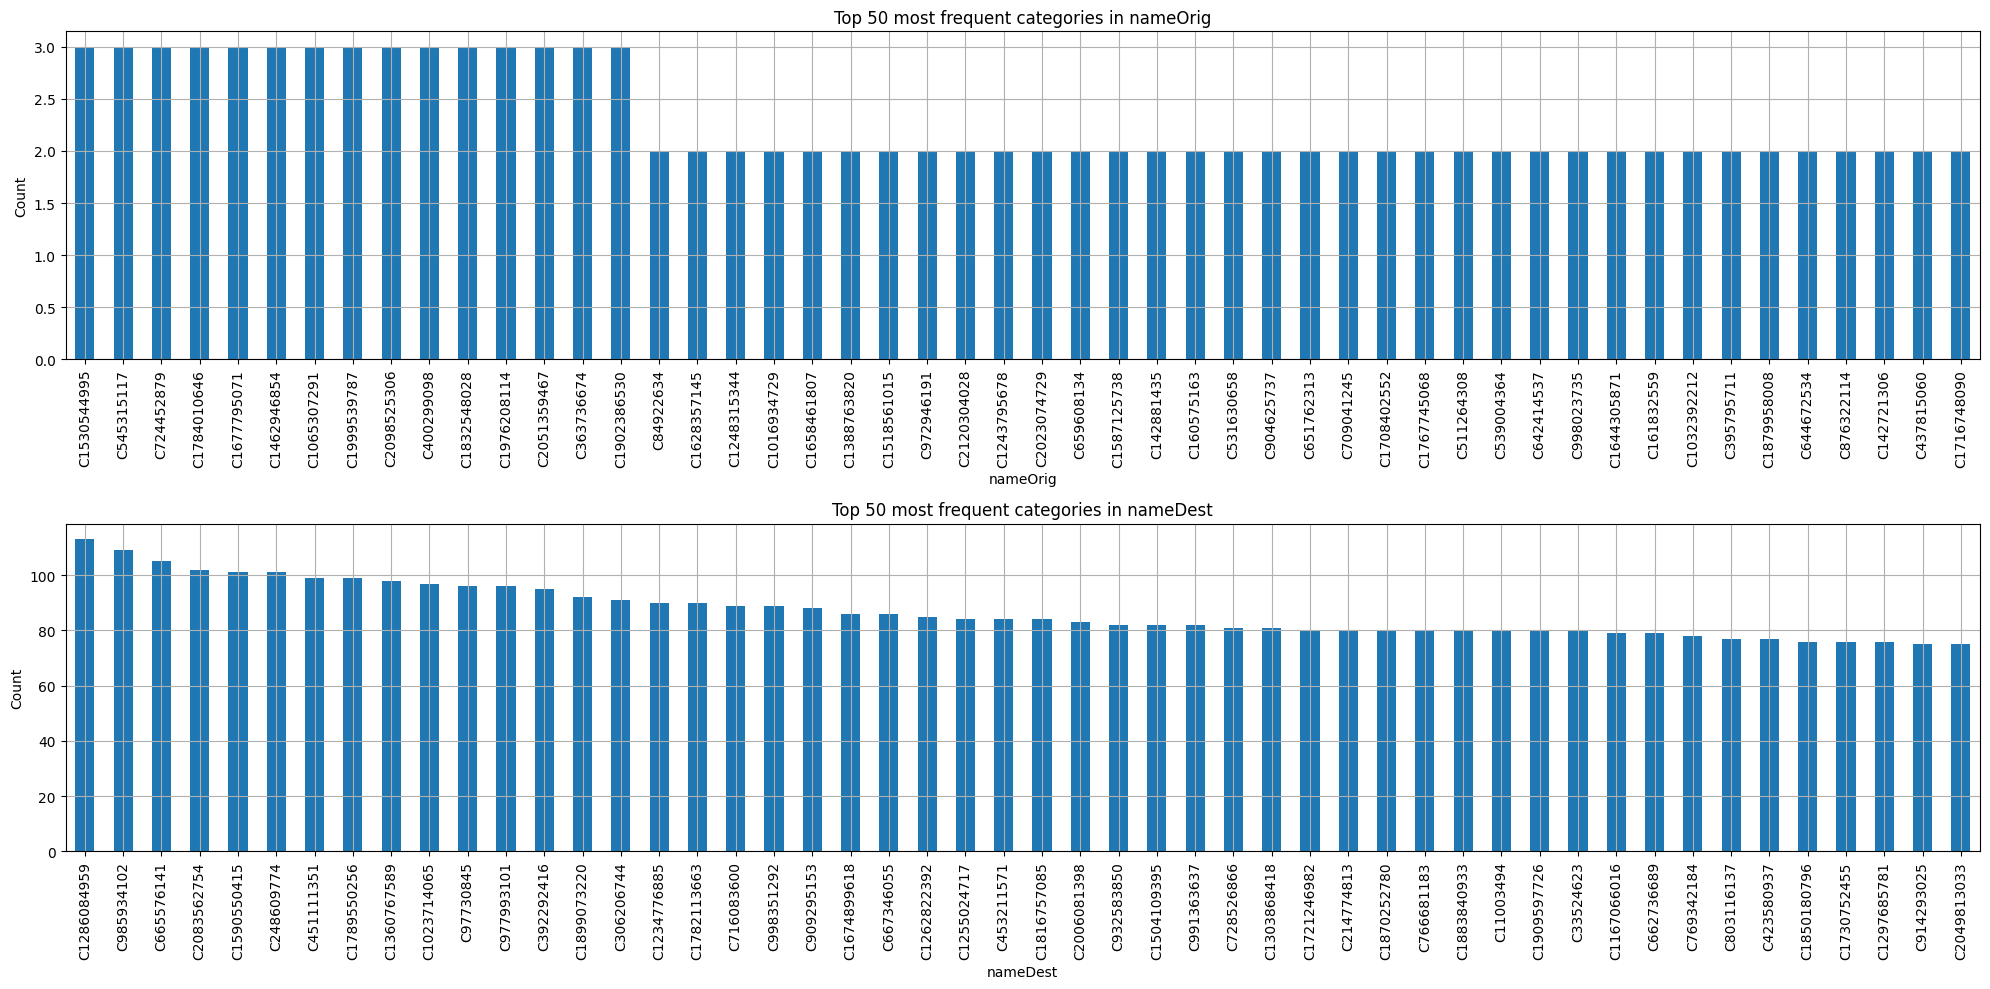

In [6]:

categorical_cols = [ 'nameOrig', 'nameDest']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

for ax, col in zip(axs, categorical_cols):
    top_categories = data[col].value_counts().nlargest(50)
    
    top_categories.plot(kind='bar', ax=ax)
    
    ax.set_title(f'Top 50 most frequent categories in {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

Observations:

- Most frequent types are cash-out and payments
- Both nameOrig and nameDest have repeated values that will be studied later.

## Overview of the numerical columns

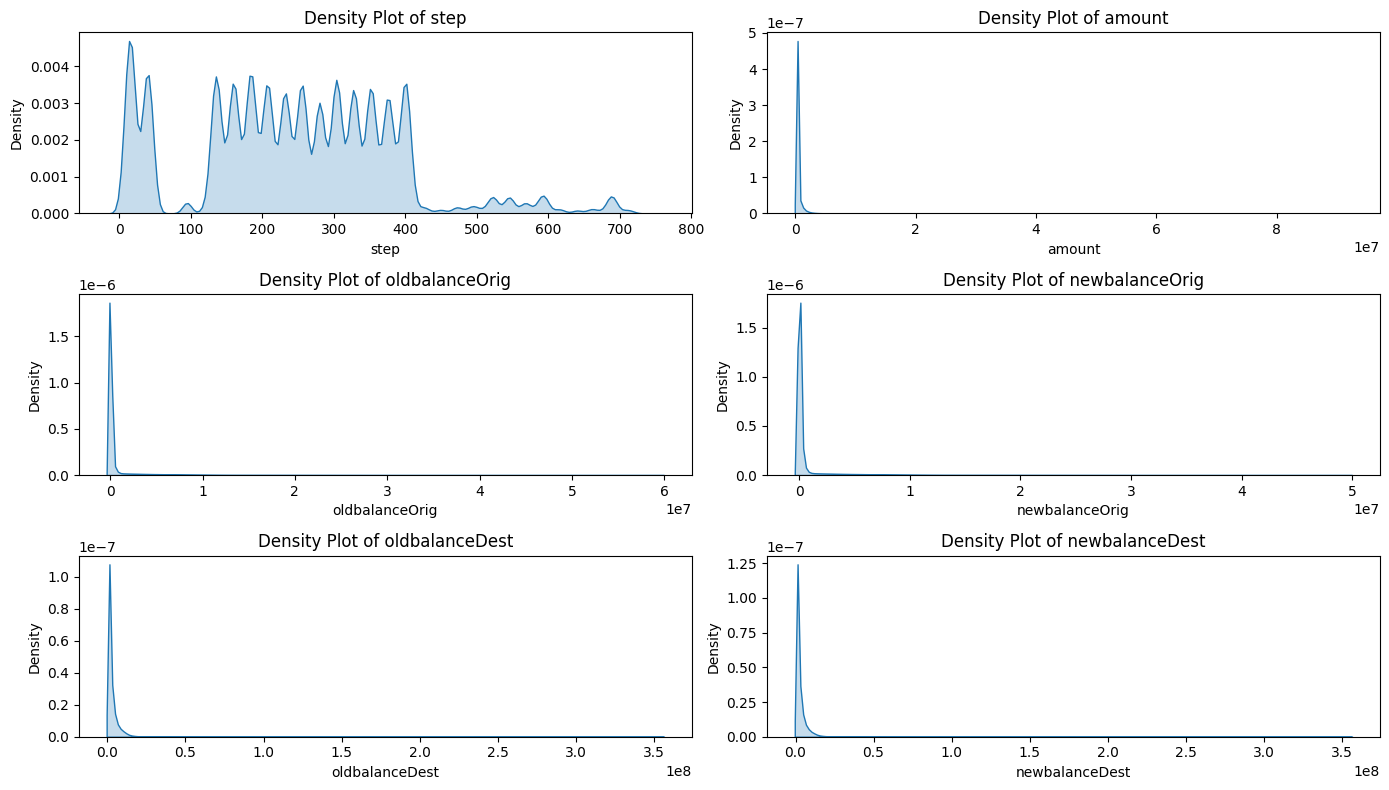

In [7]:
numeric_cols =['step', 'amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,8))
axes = axes.flatten()  

for ax, col in zip(axes, numeric_cols):
    sns.kdeplot(data[col], ax=ax, fill=True)
    ax.set_title(f'Density Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

Observations:

The columns 'amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest' have most of the values slighty above 0. 

The column 'step' has  two ranges that look interesting and will be checked later more accurately.

In [8]:
skew_vals = data[numeric_cols].skew().reset_index()
skew_vals.columns = ['Feature', 'Skewness']


print("Skewness of numerical values")
print(skew_vals)

Skewness of numerical values
          Feature   Skewness
0            step   0.375177
1          amount  30.993949
2  oldbalanceOrig   5.249136
3  newbalanceOrig   5.176884
4  oldbalanceDest  19.921758
5  newbalanceDest  19.352302


In [9]:
kurtosis_vals = data[numeric_cols].kurtosis().reset_index()
kurtosis_vals.columns = ['Feature', 'Kurtosis']


print("Kurtosis of numerical values")
print(kurtosis_vals)

Kurtosis of numerical values
          Feature     Kurtosis
0            step     0.329071
1          amount  1797.956705
2  oldbalanceOrig    32.964879
3  newbalanceOrig    32.066985
4  oldbalanceDest   948.674125
5  newbalanceDest   862.156508


### Step

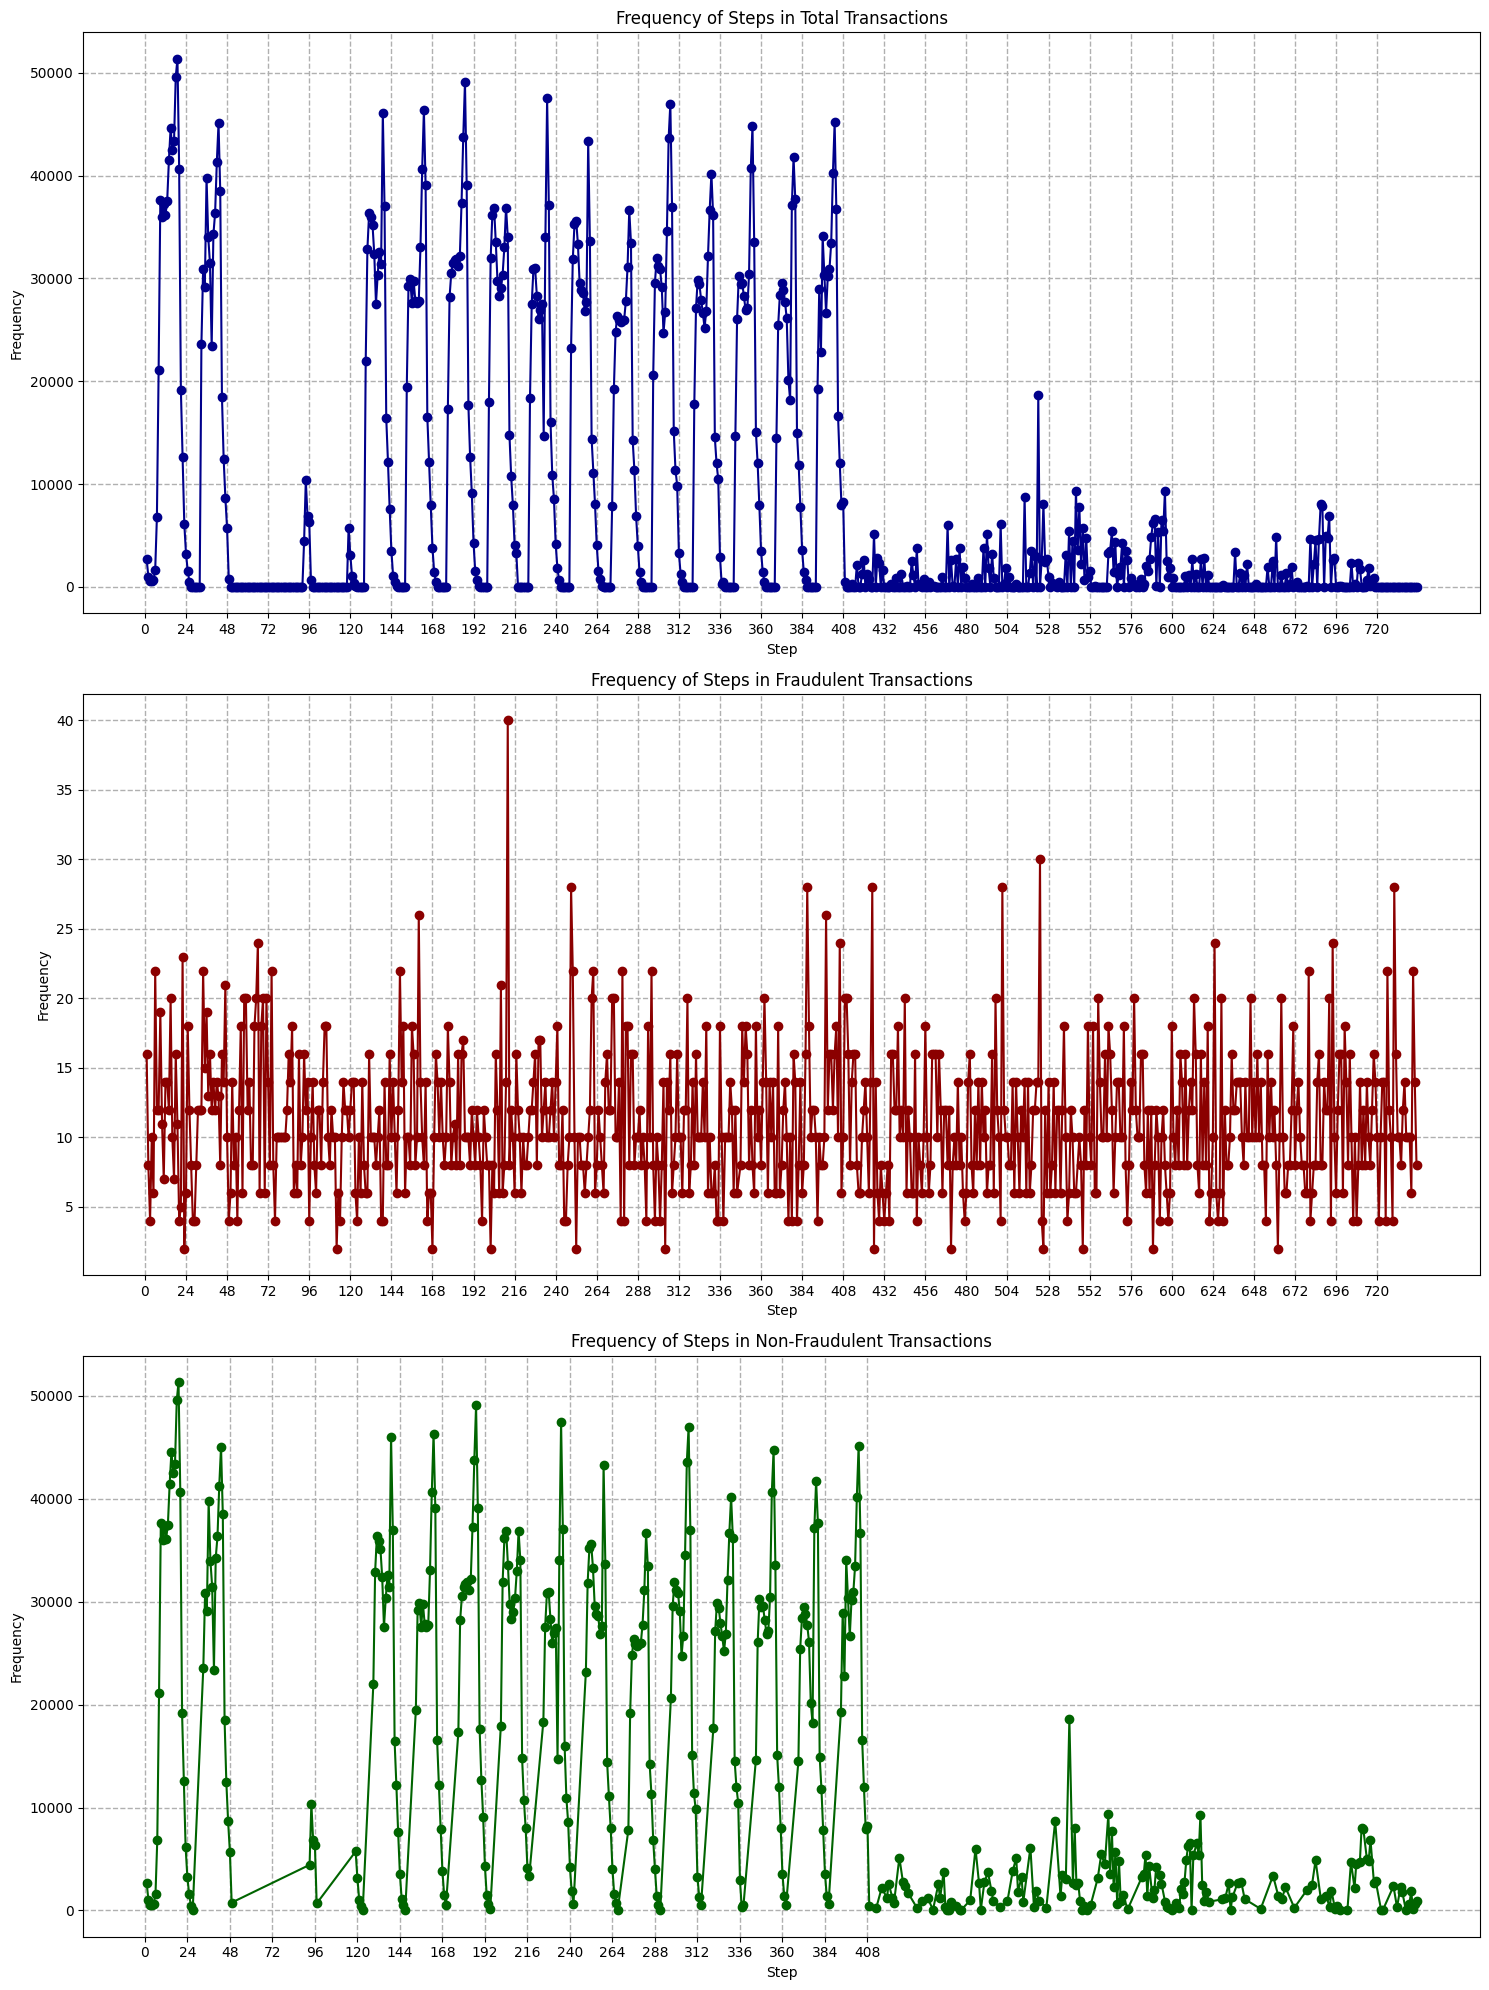

In [10]:
total_value_counts = data['step'].value_counts().sort_index()
fraud_value_counts = data[data['isFraud'] == 1]['step'].value_counts().sort_index()
non_fraud_value_counts = data[data['isFraud'] == 0]['step'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

for ax, counts, title, color in zip(axes, [total_value_counts, fraud_value_counts, non_fraud_value_counts], 
                                    ["Frequency of Steps in Total Transactions", 
                                     "Frequency of Steps in Fraudulent Transactions", 
                                     "Frequency of Steps in Non-Fraudulent Transactions"], 
                                    ['#00008B', '#8B0000', '#006400']):
    ax.plot(counts.index, counts, marker='o', color=color)
    ax.set_title(title)
    ax.set_xlabel("Step")
    ax.set_ylabel("Frequency")
    ax.grid(which='both', linestyle='--', linewidth=1)
    ax.set_xticks(np.arange(0, len(counts) + 1, 24)) 
    
plt.tight_layout()
plt.show()

Observations:

For context, 1 step represents 1 hour. The total range of hour data is equivalent to a month. 

There is a clear pattern that differentiates the behaviour between the fraudulent and the non-fraudulent transactions. 

Non-fraudulent transactions happen inside defined step ranges and slow down when the step is a bit higher than 400 (15 days aprox). This behaviour makes sense since people get their salaries at the beginning of the month. The is a gap between the first 48 and 120 hours. It would be interesting to get more information about the month, year, country from where the transaction was sent/received. Was it a public holiday? 

Fraudulent transactions stay constant along the step range. That means fraudsters behaviour stays constant all over the month. 

Fraudsters usually take very short time to process the transaction so it would be also nice to obtain data about the amount of time spent on the merchants website, the time used by the client to confirm the transaction (short times can indicate that a bot is actually using the platform), etc.

### Amount

In [11]:
null_amount_orig = data.query('amount == 0').sort_values(by = 'nameOrig').reset_index()
print(f' Total amount of accounts that withdrew no money is : {len(null_amount_orig)}')
null_amount_orig 

 Total amount of accounts that withdrew no money is : 16


,index,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1
1,5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1
2,6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1
3,6351226,702,CASH_OUT,0.0,C1461113533,0.0,0.0,C1382150537,107777.02,107777.02,1
4,2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1
5,6296015,671,CASH_OUT,0.0,C1960007029,0.0,0.0,C459118517,27938.72,27938.72,1
6,6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1
7,6281485,646,CASH_OUT,0.0,C1997645312,0.0,0.0,C601248796,0.00,0.00,1
8,6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1
9,6362463,730,CASH_OUT,0.0,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1


Observations:

Withrawals with amount = 0 are fraudulent, none of them is repeated and they have been used to try to withdraw money. We could analyze the origin and destination users and see their behaviour. One example could be using the postal code, the IP data, the account age, etc. to find hidden patterns.

Further analysis of this variable can be found inside the var_amount notebook

### Balances in origin

In [12]:
subset_orig = data[['type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'isFraud']].copy()
subset_orig['amount_moved'] = (subset_orig['oldbalanceOrig'] - subset_orig['newbalanceOrig']).round(2)
subset_orig = subset_orig.loc[subset_orig['amount'] != subset_orig['amount_moved']]
subset_orig


,type,amount,oldbalanceOrig,newbalanceOrig,isFraud,amount_moved
8,PAYMENT,4024.36,2671.00,0.00,0,2671.0
10,DEBIT,9644.94,4465.00,0.00,0,4465.0
13,PAYMENT,11633.76,10127.00,0.00,0,10127.0
15,CASH_OUT,229133.94,15325.00,0.00,0,15325.0
16,PAYMENT,1563.82,450.00,0.00,0,450.0
...,...,...,...,...,...,...
6362321,CASH_OUT,186273.84,168046.00,0.00,0,168046.0
6362322,TRANSFER,82096.45,13492.00,0.00,0,13492.0
6362460,TRANSFER,10000000.00,17316255.05,17316255.05,1,0.0
6362462,TRANSFER,7316255.05,17316255.05,17316255.05,1,0.0


Observations:

- Second row. How can a debit transaction can move more money than it is inside the bank account? 

#### Potential losses in the origin

In [13]:
subset_orig.query('isFraud == 1')

,type,amount,oldbalanceOrig,newbalanceOrig,isFraud,amount_moved
724,CASH_OUT,416001.33,0.00,0.00,1,0.00
1911,CASH_OUT,132842.64,4499.08,0.00,1,4499.08
14861,CASH_OUT,181728.11,0.00,0.00,1,0.00
25875,TRANSFER,1078013.76,0.00,0.00,1,0.00
77745,CASH_OUT,277970.88,0.00,0.00,1,0.00
138559,TRANSFER,1933920.80,0.00,0.00,1,0.00
169998,CASH_OUT,149668.66,0.00,0.00,1,0.00
178668,CASH_OUT,222048.71,0.00,0.00,1,0.00
200845,CASH_OUT,454859.39,0.00,0.00,1,0.00
217978,TRANSFER,123194.95,79466.45,0.00,1,79466.45


Observations:

The fraudsters were aware of the account balance and transferred the whole amount maybe? I don't understand how they could have done it but it's an interesting behaviour that could be further investigated

### Balances in the destination

In [14]:
subset_dest = data[['type', 'amount', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].copy()
subset_dest['amount_moved'] = (subset_dest['newbalanceDest'] - subset_dest['oldbalanceDest']).round(2)
subset_dest = subset_dest.loc[subset_dest['amount'] != subset_dest['amount_moved']]
subset_dest

,type,amount,oldbalanceDest,newbalanceDest,isFraud,amount_moved
0,PAYMENT,9839.64,0.00,0.00,0,0.00
1,PAYMENT,1864.28,0.00,0.00,0,0.00
2,TRANSFER,181.00,0.00,0.00,1,0.00
3,CASH_OUT,181.00,21182.00,0.00,1,-21182.00
4,PAYMENT,11668.14,0.00,0.00,0,0.00
...,...,...,...,...,...,...
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,1,1258818.83
6362614,TRANSFER,339682.13,0.00,0.00,1,0.00
6362616,TRANSFER,6311409.28,0.00,0.00,1,0.00
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,1,6311409.27


#### Potential losses in the destination

In [15]:
subset_dest.query('isFraud == 1')

,type,amount,oldbalanceDest,newbalanceDest,isFraud,amount_moved
2,TRANSFER,181.00,0.00,0.00,1,0.00
3,CASH_OUT,181.00,21182.00,0.00,1,-21182.00
251,TRANSFER,2806.00,0.00,0.00,1,0.00
252,CASH_OUT,2806.00,26202.00,0.00,1,-26202.00
680,TRANSFER,20128.00,0.00,0.00,1,0.00
...,...,...,...,...,...,...
6362613,CASH_OUT,1258818.82,503464.50,1762283.33,1,1258818.83
6362614,TRANSFER,339682.13,0.00,0.00,1,0.00
6362616,TRANSFER,6311409.28,0.00,0.00,1,0.00
6362617,CASH_OUT,6311409.28,68488.84,6379898.11,1,6311409.27


Observations:

Further investigation can be done here. Amounts don't match and there can be some patterns hidden related to user. Other features I would consider important are features related to location and transaction time

### Name Origin

In [16]:
subset_orig_dest = data[['nameOrig', 'nameDest', 'isFraud']].copy()
subset_orig_dest

,nameOrig,nameDest,isFraud
0,C1231006815,M1979787155,0
1,C1666544295,M2044282225,0
2,C1305486145,C553264065,1
3,C840083671,C38997010,1
4,C2048537720,M1230701703,0
...,...,...,...
6362615,C786484425,C776919290,1
6362616,C1529008245,C1881841831,1
6362617,C1162922333,C1365125890,1
6362618,C1685995037,C2080388513,1


In [17]:
# Group by nameOrig
nameorig_counts = subset_orig_dest.groupby('nameOrig').size()
nameorig_counts


nameOrig
C1000000639    1
C1000001337    1
C1000001725    1
C1000002591    1
C1000003372    1
              ..
C999996999     1
C999998175     1
C999999254     1
C999999614     1
C999999784     1
Length: 6353307, dtype: int64

In [18]:
# Get the nameOrig with occurence > 1 
nameorig_common = nameorig_counts[nameorig_counts > 1]
subset_nameorig_repeated = data[data['nameOrig'].isin(nameorig_common.index)]

Can we find users in the origin with mixed fraudulent and not fraudulent behaviour? Are they only doing fraud? 

In [19]:
fraudulent = subset_nameorig_repeated[subset_nameorig_repeated['isFraud'] == 1]['nameOrig'].unique()
non_fraudulent = subset_nameorig_repeated[subset_nameorig_repeated['isFraud'] == 0]['nameOrig'].unique()

common_fraud_nonfraud = np.intersect1d(fraudulent, non_fraudulent)
common_fraud_nonfraud

array(['C1015856166', 'C1044518032', 'C10982843', 'C1118399210',
       'C1127304441', 'C1191696703', 'C1498185758', 'C1627918307',
       'C171834973', 'C1851065642', 'C1863683348', 'C1882162040',
       'C1885333477', 'C1899367925', 'C2004363483', 'C357911107',
       'C431038121', 'C432562518', 'C471097879', 'C483009518',
       'C570470570', 'C635739031', 'C686187434', 'C803411135',
       'C812001868', 'C850961884', 'C876181265', 'C929585215'],
      dtype=object)

In [20]:
fraud_nonfraud_in_orig = data[data['nameOrig'].isin(common_fraud_nonfraud)].sort_values(by = 'nameOrig', ascending = True).reset_index(drop = True)
fraud_nonfraud_in_orig.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,257,PAYMENT,2496.73,C1015856166,0.00,0.00,M183948217,0.00,0.00,0
1,453,CASH_OUT,2600970.32,C1015856166,2600970.32,0.00,C1424612838,2111795.89,4712766.22,1
2,19,CASH_IN,78603.46,C1044518032,1592298.26,1670901.72,C1544000930,156378.24,0.00,0
3,388,CASH_OUT,20393.12,C1044518032,20393.12,0.00,C1479987881,293446.62,313839.74,1
4,335,PAYMENT,5538.46,C10982843,29270.00,23731.54,M1708468225,0.00,0.00,0


Observations:

There is a very small amount of account data that shares fraudulent and non-fraudulent transactions. The only pattern observed is that every account has one fraudulent and one non-fraudulent transaction. Further analysis could be done here as long as we continue getting data to understand the behavior of these "hybrid" accounts

In [21]:
two_times_nameorig = nameorig_counts[nameorig_counts == 2]
subset_data_two_times = data[data['nameOrig'].isin(two_times_nameorig.index)]
subset_two_data_filtered = subset_data_two_times[~subset_data_two_times['nameOrig'].isin(common_fraud_nonfraud)].sort_values(by = 'nameOrig', ascending = True).reset_index(drop = True)
subset_two_data_filtered


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,254,CASH_IN,21813.13,C100025963,51809.00,73622.13,C1702915472,1657470.21,1635657.07,0
1,277,CASH_IN,68949.69,C100025963,797.00,69746.69,C1615713927,312817.27,243867.58,0
2,352,CASH_IN,146953.48,C1000442951,8737581.06,8884534.54,C642896648,596519.76,449566.28,0
3,15,CASH_OUT,44373.09,C1000442951,57101.00,12727.91,C994420111,83181.14,0.00,0
4,285,CASH_OUT,188876.87,C1000947901,0.00,0.00,C244769530,639830.17,828707.04,0
...,...,...,...,...,...,...,...,...,...,...
18505,209,CASH_OUT,165724.25,C999849840,21.00,0.00,C885377382,2526597.36,2692321.61,0
18506,156,CASH_OUT,170525.30,C999951360,0.00,0.00,C728588351,212287.42,382812.72,0
18507,202,CASH_OUT,73863.12,C999951360,0.00,0.00,C2035259819,477842.77,551705.88,0
18508,300,CASH_OUT,180065.16,C999972841,0.00,0.00,C1934233468,951897.18,1131962.34,0


In [22]:
subset_two_data_filtered.query('isFraud == 1')

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


In [23]:
three_times_nameorig = nameorig_counts[nameorig_counts == 3]
subset_data_three_times = data[data['nameOrig'].isin(three_times_nameorig.index)].sort_values(by = 'nameOrig', ascending = True).reset_index(drop = True)
subset_data_three_times.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,17,PAYMENT,5530.99,C1065307291,819637.87,814106.88,M1175397032,0.00,0.00,0
1,347,PAYMENT,19717.82,C1065307291,0.00,0.00,M2131079968,0.00,0.00,0
2,162,CASH_IN,88230.47,C1065307291,38128.00,126358.47,C1154752493,0.00,0.00,0
3,596,CASH_IN,113062.25,C1462946854,10580.00,123642.25,C569031032,538446.03,425383.78,0
4,514,CASH_IN,34253.45,C1462946854,1643662.56,1677916.01,C1393447203,130343.84,96090.39,0


In [24]:
subset_data_three_times.query('isFraud == 1')

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


Observations:

The remaining commonly used accounts (more than two times) only have non fraudulent transactions

### Name Destination

In [25]:
# Group by nameOrig
namedest_counts = subset_orig_dest.groupby('nameOrig').size()
namedest_counts

nameOrig
C1000000639    1
C1000001337    1
C1000001725    1
C1000002591    1
C1000003372    1
              ..
C999996999     1
C999998175     1
C999999254     1
C999999614     1
C999999784     1
Length: 6353307, dtype: int64

In [26]:
# Get the nameOrig with occurence > 1 
namedest_common = namedest_counts[namedest_counts > 1]
subset_namedest_repeated = data[data['nameDest'].isin(namedest_common.index)]

Can we find users in the destination with mixed fraudulent and not fraudulent behaviour? Are they only doing fraud? 

In [27]:
fraudulent = subset_namedest_repeated[subset_namedest_repeated['isFraud'] == 1]['nameDest'].unique()
non_fraudulent = subset_namedest_repeated[subset_namedest_repeated['isFraud'] == 0]['nameDest'].unique()

common_fraud_nonfraud = np.intersect1d(fraudulent, non_fraudulent)
common_fraud_nonfraud

array([], dtype=object)

In [28]:
two_times_namedest = namedest_counts[namedest_counts == 2]
subset_data_two_times = data[data['nameDest'].isin(two_times_namedest.index)]
subset_data_two_times.query('isFraud == 1')

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


In [29]:
three_times_namedest = namedest_counts[namedest_counts == 3]
subset_data_three_times = data[data['nameDest'].isin(three_times_namedest.index)].sort_values(by = 'nameDest', ascending = True).reset_index(drop = True)
subset_data_three_times.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


Observations:

Merchants only have 1 time fraud occurence. That can happen if the client rejects the transaction thinking it's an invalid but it is valid. Maybe the forgot they bought an item by the time the transaction was done.

## Outliers

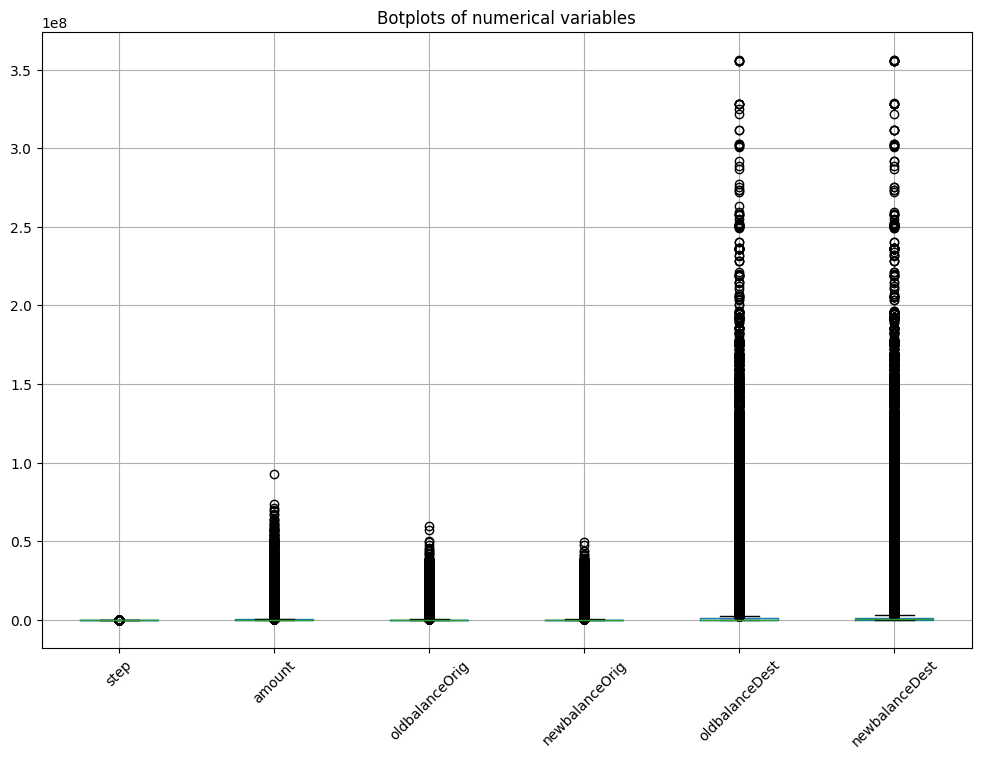

In [30]:
plt.figure(figsize=(12, 8))
data[numeric_cols].boxplot()
plt.title('Botplots of numerical variables')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0, None
    else:
        percentage = (len(outliers) / len(data)) * 100
        count_outliers = len(outliers)
        return column, percentage, count_outliers

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage, count_outliers) for column, percentage, count_outliers in columns_with_outliers if column is not None]

for column, percentage, count_outliers in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%, Total amount of outliers: {count_outliers}")


Column: step, Percentage of outliers: 1.61%, Total amount of outliers: 102688
Column: amount, Percentage of outliers: 5.31%, Total amount of outliers: 338078
Column: oldbalanceOrig, Percentage of outliers: 17.49%, Total amount of outliers: 1112507
Column: newbalanceOrig, Percentage of outliers: 16.56%, Total amount of outliers: 1053391
Column: oldbalanceDest, Percentage of outliers: 12.36%, Total amount of outliers: 786135
Column: newbalanceDest, Percentage of outliers: 11.61%, Total amount of outliers: 738527
Column: isFraud, Percentage of outliers: 0.13%, Total amount of outliers: 8213


## Correlation

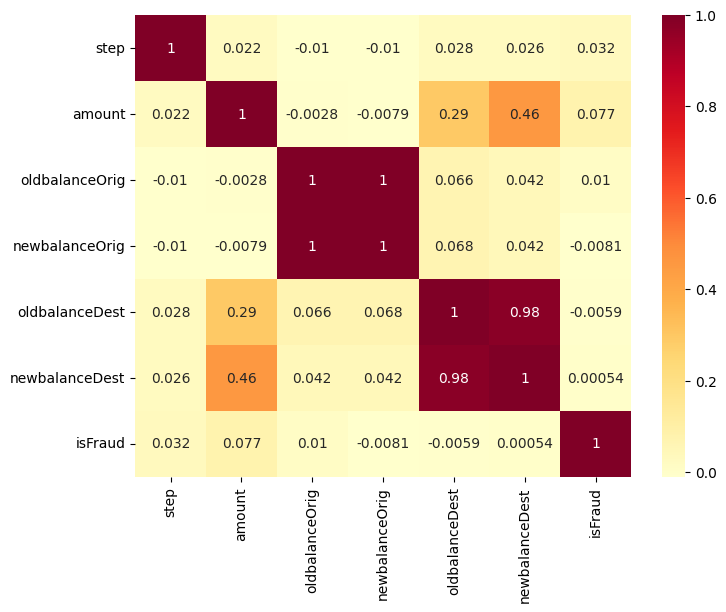

In [32]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

Observations:

High multicollinearity between newbalanceDest and oldbalanceDest as we saw before. 
Check var_balance notebook for further analysis